In [1]:
import matplotlib.pyplot as plt
import pandas as pd

seqDf = pd.read_csv('out1Seq.txt', sep=',')
cudDf = pd.read_csv('out1Cuda.txt', sep=',')
clDf = pd.read_csv('out1CL.txt', sep=',')
# cudShDf = pd.read_csv('outCudaShared.txt', sep=',')
# cud2dDf = pd.read_csv('outCuda2D.txt', sep=',')

In [8]:
import numpy as np

n = seqDf["n"].drop_duplicates().to_numpy()
avgDf = pd.DataFrame(columns=["Sequential","Cuda 64 threads","OpenCL 64 threads","Cuda 128 threads","OpenCL 128 threads"], index=n)

for i in n:
    print(i)
    avgSeq = 0
    avgCud64 = 0
    avgCL64 = 0
    avgCud128 = 0
    avgCL128 = 0

    if i <= 256:
        for index, row in seqDf.loc[seqDf["n"] == i].iterrows():
            avgSeq += row["time"]
        avgSeq /= len(seqDf.loc[seqDf["n"] == i])
        avgSeq /= 1000

    for index, row in cudDf.loc[(cudDf["n"] == i) & (cudDf["threads"] == 64)].iterrows():
        avgCud64 += row["time"]
    avgCud64 /= len(cudDf.loc[(cudDf["n"] == i) & (cudDf["threads"] == 64)])
    avgCud64 /= 1000

    for index, row in cudDf.loc[(cudDf["n"] == i) & (cudDf["threads"] == 128)].iterrows():
        avgCud128 += row["time"]
    avgCud128 /= len(cudDf.loc[(cudDf["n"] == i) & (cudDf["threads"] == 128)])
    avgCud128 /= 1000

    for index, row in clDf.loc[(clDf["n"] == i) & (clDf["threads"] == 64)].iterrows():
        avgCL64 += row["time"]
    avgCL64 /= len(clDf.loc[(clDf["n"] == i) & (clDf["threads"] == 64)])
    avgCL64 /= 1000

    for index, row in clDf.loc[(clDf["n"] == i) & (clDf["threads"] == 128)].iterrows():
        avgCL128 += row["time"]
    avgCL128 /= len(clDf.loc[(clDf["n"] == i) & (clDf["threads"] == 128)])
    avgCL128 /= 1000

    avgDf.loc[i] = {"Sequential": avgSeq,"Cuda 64 threads": avgCud64,"OpenCL 64 threads": avgCL64,"Cuda 128 threads": avgCud128,"OpenCL 128 threads": avgCL128}


display(avgDf)

16
32
64
128


,Sequential,Cuda 64 threads,OpenCL 64 threads,Cuda 128 threads,OpenCL 128 threads
16,21.7162,43.156,32.9572,61.0062,42.9526
32,79.282,47.2344,56.394,83.1654,68.3574
64,303.0944,74.0476,62.6454,117.25,106.8708
128,0.0,126.2458,112.3426,217.678,151.596


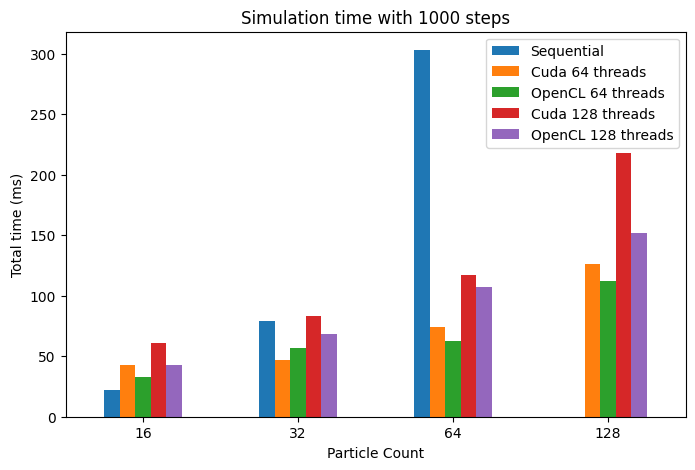

In [10]:
a1_1 = avgDf.loc[[16, 32, 64, 128]].plot(kind='bar', rot=0, xlabel='Particle Count', ylabel='Total time (ms)', title='Simulation time with 1000 steps', figsize=(8, 5))

In [ ]:
a1_2 = avgDf.loc[[512, 1024, 2048, 4096]].plot(kind='bar', rot=0, xlabel='Particle Count', ylabel='Total time (ms)', title='Simulation time with 1000 steps', figsize=(8, 5))